In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

In [2]:
df_hhs = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD', parse_dates = ['date'])

https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u

https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD

In [3]:
df_hhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36461 entries, 0 to 36460
Columns: 117 entries, state to total_patients_hospitalized_confirmed_influenza_coverage
dtypes: datetime64[ns](1), float64(68), int64(47), object(1)
memory usage: 32.5+ MB


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_hhs.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,inpatient_beds_used,inpatient_beds_used_coverage,inpatient_beds_used_covid,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_coverage,previous_day_admission_adult_covid_suspected,previous_day_admission_adult_covid_suspected_coverage,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_confirmed_coverage,previous_day_admission_pediatric_covid_suspected,previous_day_admission_pediatric_covid_suspected_coverage,staffed_adult_icu_bed_occupancy,staffed_adult_icu_bed_occupancy_coverage,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid_coverage,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid_coverage,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid_coverage,total_staffed_adult_icu_beds,total_staffed_adult_icu_beds_coverage,inpatient_beds_utilization,inpatient_beds_utilization_coverage,inpatient_beds_utilization_numerator,inpatient_beds_utilization_denominator,percent_of_inpatients_with_covid,percent_of_inpatients_with_covid_coverage,percent_of_inpatients_with_covid_numerator,percent_of_inpatients_with_covid_denominator,inpatient_bed_covid_utilization,inpatient_bed_covid_utilization_coverage,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_coverage,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_coverage,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator,geocoded_state,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_18-19_coverage,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_20-29_coverage,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_30-39_coverage,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_40-49_coverage,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_50-59_coverage,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_60-69_coverage,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_70-79_coverage,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_confirmed_80+_coverage,previous_day_admission_adult_covid_confirmed_unknown,previous_day_admission_adult_covid_confirmed_unknown_coverage,previous_day_admission_adult_covid_suspected_18-19,previous_day_admission_adult_covid_suspected_18-19_coverage,previous_day_admission_adult_covid_suspected_20-29,previous_day_admission_adult_covid_suspected_20-29_coverage,previous_day_admission_adult_covid_suspected_30-39,previous_day_admission_adult_covid_suspected_30-39_coverage,previous_day_admission_adult_covid_suspected_40-49,previous_day_admission_adult_covid_suspected_40-49_coverage,previ

In [6]:
df_hhs.max()

state                                                                                            WY
date                                                                            2022-01-10 00:00:00
critical_staffing_shortage_today_yes                                                            191
critical_staffing_shortage_today_no                                                             495
critical_staffing_shortage_today_not_reported                                                   506
critical_staffing_shortage_anticipated_within_week_yes                                          204
critical_staffing_shortage_anticipated_within_week_no                                           470
critical_staffing_shortage_anticipated_within_week_not_reported                                 506
hospital_onset_covid                                                                        30274.0
hospital_onset_covid_coverage                                                                   597


In [12]:
df_hhs[df_hhs.date == '2021-07-29']['critical_staffing_shortage_today_yes'].sum()

626

In [17]:
date_list = df_hhs.date.unique()

In [19]:
date_list


array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28

In [35]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['critical_staffing_shortage_today_yes'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['critical_staffing_shortage_today_yes'].sum()))

0
16
16
16
16
16
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
9
4
4
4
5
242
334
417
418
418
440
476
628
675
707
709
688
749
754
762
782
789
765
742
780
778
802
775
788
773
746
792
795
772
781
799
779
766
782
775
772
793
800
769
763
782
761
791
786
816
810
780
815
808
827
832
842
812
904
876
898
910
908
931
887
884
910
918
902
914
857
829
809
844
849
852
834
859
829
837
874
852
867
861
892
858
849
899
893
905
920
933
921
913
923
932
950
964
979
949
955
954
940
957
975
976
946
932
951
938
966
975
993
1015
979
981
987
999
1010
1025
992
992
1000
1047
1086
1117
1115
1092
1087
1083
1094
1136
1131
1146
1133
1120
1125
1122
1174
1135
1148
1158
1154
1132
1110
1179
1181
1183
11

[(numpy.datetime64('2020-01-01T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-02T00:00:00.000000000'), 16),
 (numpy.datetime64('2020-01-03T00:00:00.000000000'), 16),
 (numpy.datetime64('2020-01-04T00:00:00.000000000'), 16),
 (numpy.datetime64('2020-01-05T00:00:00.000000000'), 16),
 (numpy.datetime64('2020-01-06T00:00:00.000000000'), 16),
 (numpy.datetime64('2020-01-07T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-08T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-09T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-10T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-11T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-12T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-13T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-14T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-15T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-16T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-01-17T00:00:00.000000000'), 0),
 (numpy.datetime64('2020-0

In [37]:
df_total_critical = pd.DataFrame(aaa, columns=['date','reported_critical_sum'])

In [38]:
df_total_critical

,date,reported_critical_sum
0,2020-01-01,0
1,2020-01-02,16
2,2020-01-03,16
3,2020-01-04,16
4,2020-01-05,16
5,2020-01-06,16
6,2020-01-07,0
7,2020-01-08,0
8,2020-01-09,0
9,2020-01-10,0


In [52]:
bbb = df_total_critical[-500::]

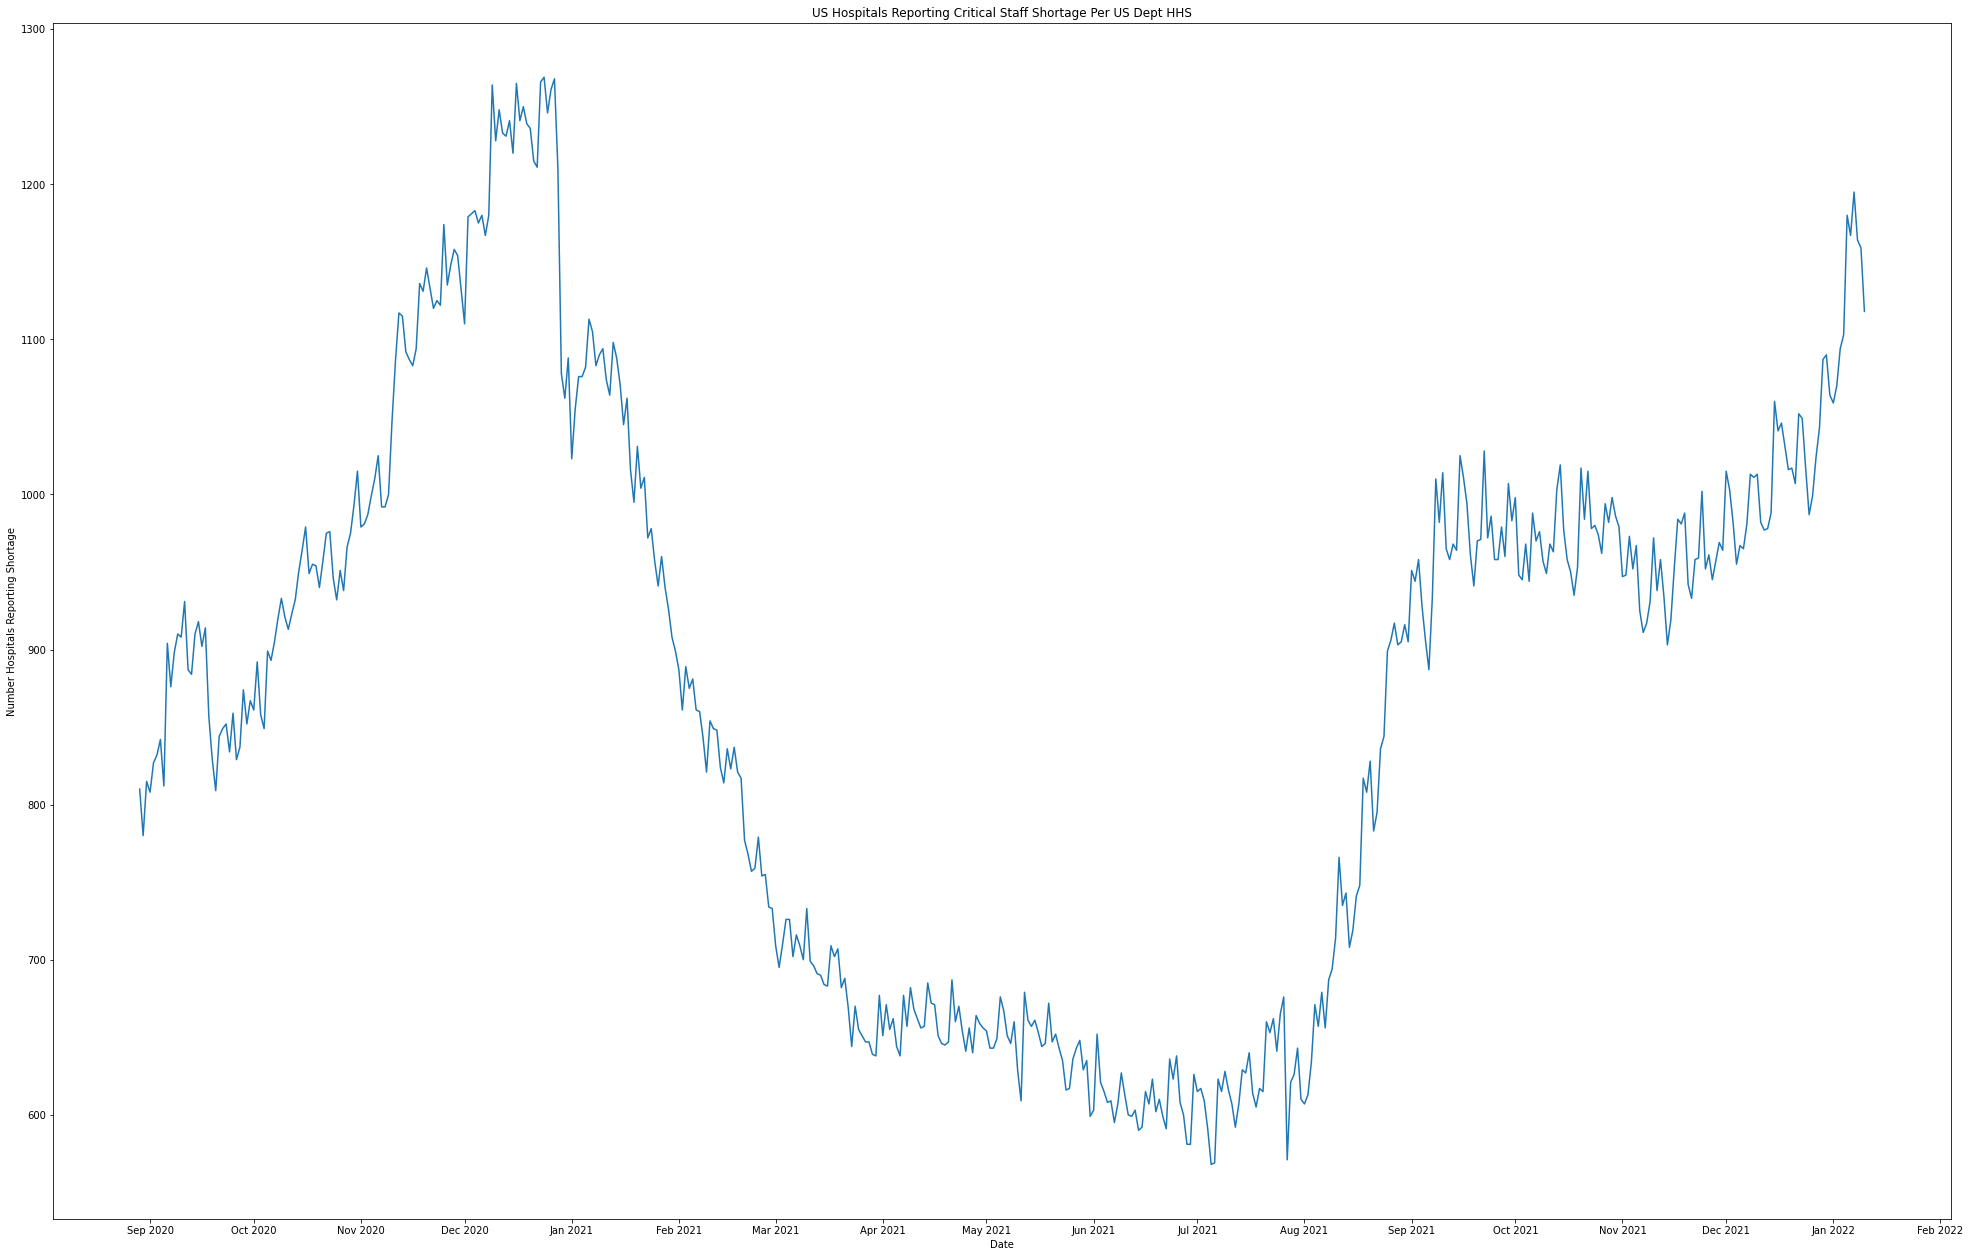

In [55]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(34,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('US Hospitals Reporting Critical Staff Shortage Per US Dept HHS')
plt.xlabel('Date',color='black')
plt.ylabel('Number Hospitals Reporting Shortage',color='black')
plt.plot(bbb.date, bbb.reported_critical_sum)
#plt.plot(df_newcases_7day_moving, 'ro')
#plt.legend(['7 Day Rolling Average','Daily Active Cases'])
fig.savefig('HHS_critical_staffing_shortage_today.png')